In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import seaborn as sns

In [2]:

plt.rc('figure', figsize=(13, 10))
plt.rc('font', size=14)


In [3]:
import os

In [4]:
from env import host, user, password

In [5]:
def get_db(db, user = user, host = host, password = password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [6]:
def get_telco_data():
    
    my_telco_query = '''SELECT c.*, pt.payment_type, ist.internet_service_type, ct.contract_type
                FROM customers as c
                JOIN payment_types as pt on c.payment_type_id = pt.payment_type_id
                JOIN internet_service_types AS ist on ist.internet_service_type_id = c.internet_service_type_id
                JOIN contract_types as ct ON ct.contract_type_id = c.contract_type_id;'''
    
    
    filename = 'telco_data.csv'
    
    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        telco_df = pd.read_sql(my_telco_query, get_db('telco_churn'))
        telco_df.to_csv(filename, index = False)
        
    return telco_df

In [7]:
telco = get_telco_data()

In [15]:
# Using the "train" data set to do initial EDA and analysis on, in order to keep the train data separate.

titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
titanic.shape

(891, 12)

## Prepare data

#### Cleaning up the columns, creating dummy variables, etc:

- Sex: Female = 1, Male = 0
- drop "Name" and Ticket colulmns?

<AxesSubplot:>

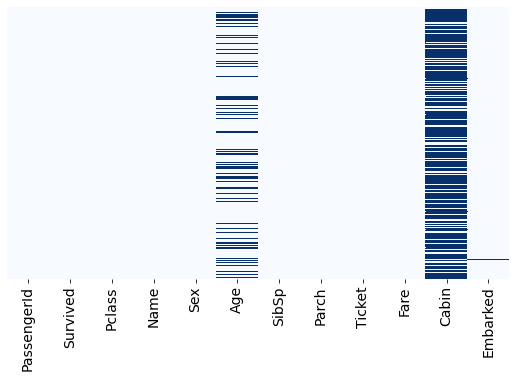

In [11]:
# Checking if I have any missing values:

plt.figure(figsize = (9, 5))

sns.heatmap(titanic.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

- Looks like there are quite a number of missing values in the cabin column, and some in the age column.
- Probably best to simply drop the cabin column. I'll need to figure out how to fill in the blanks in the age column, decide what kind of imputation to use.

In [13]:
# My dependent variable (target) is the survived column.

titanic.Survived.value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [14]:
# that's my baseline: 62% survival, 38% did not survive. My model has to beat that.